In [1]:
import os

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
#CHAMP_PATH = os.path.join('/home', 'jovyan', 'work', 'result', 'champion', 'champ.csv')
CHAMP_PATH = os.path.join('/home', 'jovyan', 'work', 'result', 'champion', 'champ_all.csv')
champ_df = pd.read_csv(CHAMP_PATH)

In [4]:
champ_df

,seed,D,problem,champion,champion_score,champion_result
0,0,5,5 10001 11011 11111 10101 10001 01110 11011 10...,beam-try10K-Cell4-Beam10,476190476,4R0-3-3-3-0-2-2-0-3-3-0-0-0-0-3-0-0-0-3-3-0-0-...
1,7,6,6 001111 000011 000101 000111 000011 000110 11...,cellpair-3-beam-5-50K,824675325,5R0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
2,12,7,7 0001010 0001110 0000011 0000111 0000011 0111...,beam-try10K-Cell4-Beam10,283333333,3R0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...
3,1,8,8 00110000 00100000 00111000 11100000 01001000...,try100K-beam5,3214520202,10R0-0-0-0-0-0-0-0-0-0-0-1-0-0-0-0-0-0-0-1-0-2...
4,9,9,9 111000000 010100000 111111000 111110100 0111...,beam-try10K-Cell4-Beam10,1253064479,7R0-0-2-2-0-3-3-5-5-2-0-2-2-0-3-3-4-4-0-0-0-0-...
...,...,...,...,...,...,...
9995,9960,9,9 000000111 000011111 000011111 000001111 0000...,NaN,2744000000000,NaN
9996,9973,9,9 000000110 000011111 000011111 000011111 0000...,NaN,2744000000000,NaN
9997,9977,9,9 000000111 000011111 000001110 000011110 0001...,NaN,2744000000000,NaN
9998,9984,9,9 000000100 000000111 000000011 000001011 0000...,NaN,2744000000000,NaN


In [8]:
champ_df.query('seed==77')

,seed,D,problem,champion,champion_score,champion_result
110,77,5,5 00011 00011 00011 00011 00011 10000 11000 11...,exact-v1-2h,167832168,2R0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-0-...


In [76]:
info_df = pd.read_csv(os.path.join('/home', 'jovyan', 'work', '01_testset', '03_testset_stress_info.csv'))

In [77]:
champ_df = pd.merge(champ_df, info_df[['seed', 'difficulty']], on='seed', how='left')

In [78]:
champ_df['count'] = 1

In [79]:
np.mean(champ_df.query('champion_score < 2744000000000')['champion_score'])

977809464.5235

## 全体比較

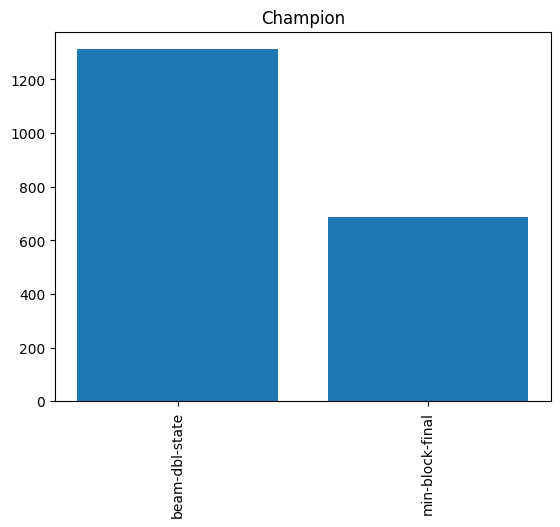

In [80]:
plot_df = champ_df[['champion', 'count']].groupby('champion').sum()

x_list = plot_df.index
y_list = plot_df['count']

plt.bar(x_list, y_list)
plt.xticks(rotation=90)
plt.title('Champion');

In [81]:
plot_df

,count
champion,
beam-dbl-state,1313
min-block-final,687


## D別

In [82]:
def xy_plot(plot_df, normalize=False):
    fig, ax = plt.subplots(figsize=(10, 8))
    
    if normalize:
        for col in plot_df.columns:
            plot_df[col] = 100 * plot_df[col] / sum(plot_df[col])

    for i in range(len(plot_df)):
        ax.bar(plot_df.columns, plot_df.iloc[i], bottom=plot_df.iloc[:i].sum())

    ax.set(xlabel=plot_df.columns.name, ylabel='count')
    ax.legend(plot_df.index, bbox_to_anchor=(1.03, 1), loc='upper left')
    plt.show();    

In [83]:
plot_df = champ_df.pivot_table(index='champion', columns='D', values='count', aggfunc=sum)

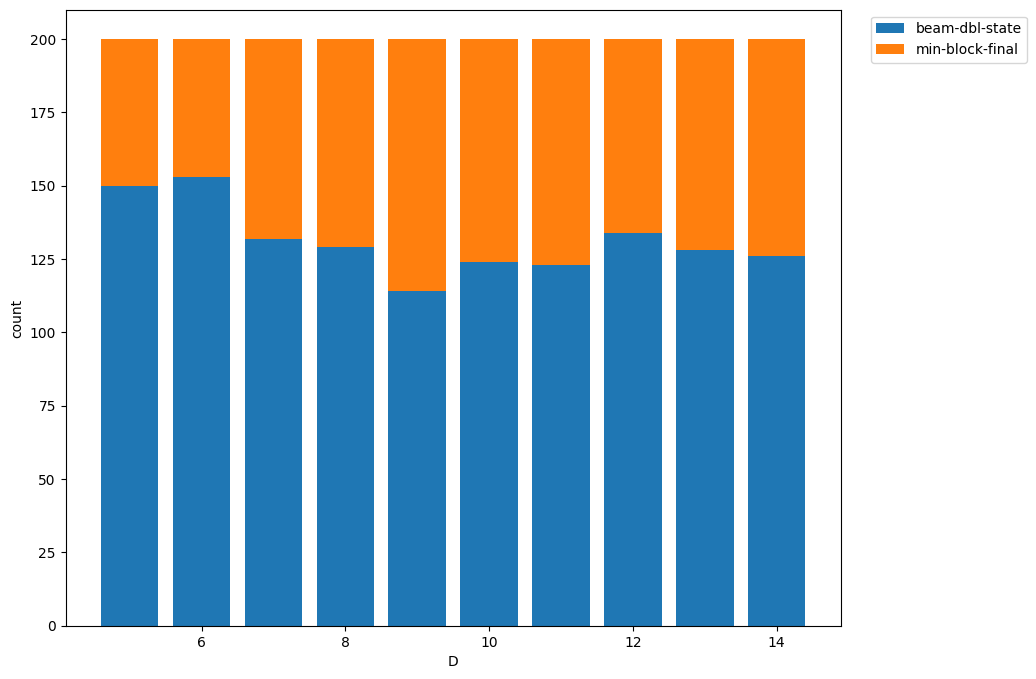

In [84]:
xy_plot(plot_df)

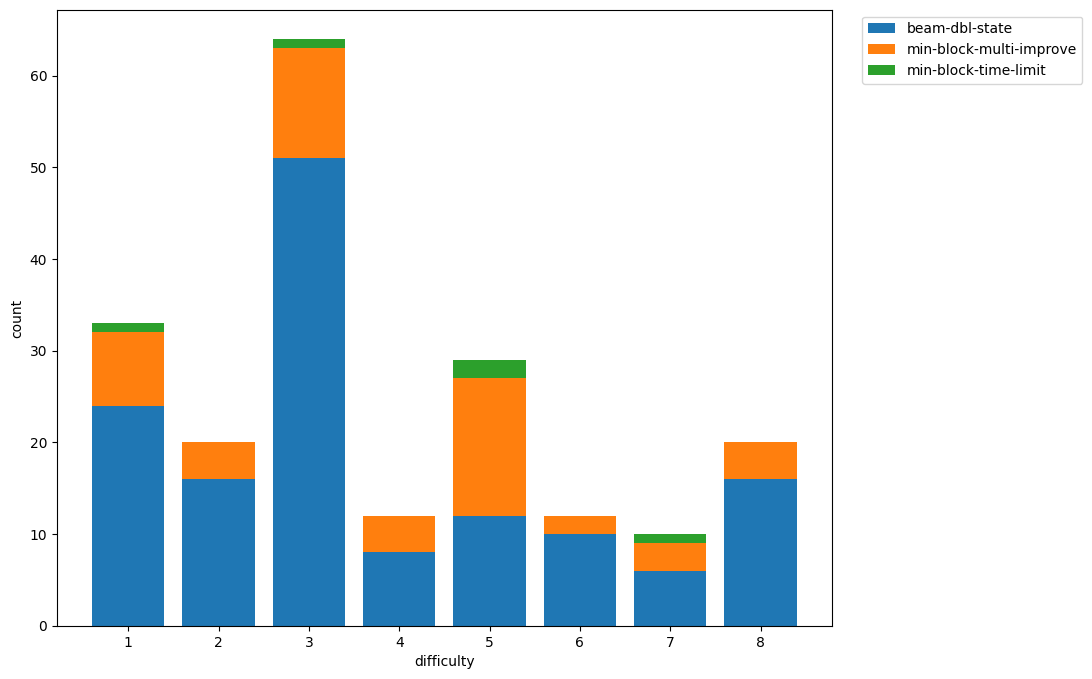

In [85]:
plot_df = check_df.pivot_table(index='champion', columns='difficulty', values='count', aggfunc=sum)
xy_plot(plot_df)

In [122]:
check_df = champ_df.copy()
check_df = check_df.query('D == 14')

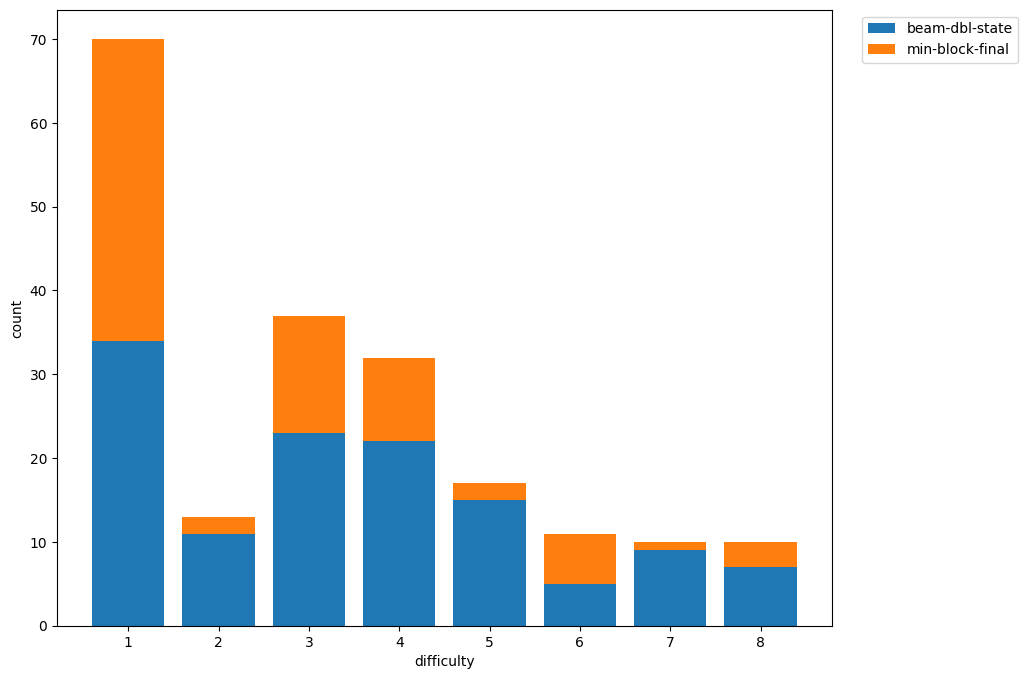

In [123]:
plot_df = check_df.pivot_table(index='champion', columns='difficulty', values='count', aggfunc=sum)
xy_plot(plot_df)

In [124]:
plot_df

difficulty,1,2,3,4,5,6,7,8
champion,,,,,,,,
beam-dbl-state,34,11,23,22,15,5,9,7
min-block-final,36,2,14,10,2,6,1,3
